# Simpsonov paradoks

Sljedeći seminar nastao je u okviru kolegija _Matematički softver_ na prvoj godini diplomskog studija Računarstvo i matematika na PMF-u.

In [ ]:
%%html
<a href='#uvod'>1. Uvod</a> <br>
<a href='#berkeley'>2. Motivacija</a><br>
<a href='#paradoks'>3. Simpsonov paradoks</a><br>
<a href='#vjezba'>4.  Korelacija tjelovježbe i bolesti </a><br>
<a href='#algoritam'>5.  Detektiranje Simpsonovog paradoksa </a><br>
<a href='#zakljucak'>6.  Zakljucak </a><br>

In [622]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import * 

## Uvod <a name="uvod"></a>

*Simpsonov paradoks* (ili Yule-Simpsonov učinak) fenomen je u vjerojatnosti i statistici, u kojem se trend pojavljuje u nekoliko različitih skupina podataka, ali nestaje ili je obrnut kada se te skupine spoje. Ovaj se rezultat često susreće u društvenim i medicinsko-znanstvenim statistikama i posebno je problematičan kada se podacima o frekvenciji neke pojave neoprezno dodjeljuju krive interpretacije. Paradoks se može riješiti kada se u statističkom modeliranju prikladno vodi računa o uzročnim odnosima. 
Edward H. Simpson prvi je opisao ovaj fenomen u tehničkom članku 1951. godine.

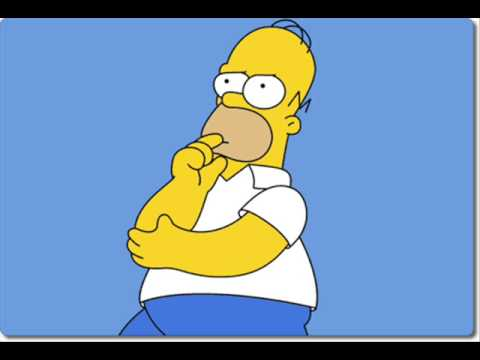

In [623]:
try:
    display(Image(filename = 'homer.jpg', width = 500 ) )
except FileNotFoundError:
    display(Image(url = 'http://m.mini-fondos.com/previews/series/simpsons_12', width = 500, 
                  title='Homer Simpson dok razmišlja o istoimenom paradoksu'))


## Motivacija<a name="berkeley"></a>

### Sveučilište Berkeley - rodna ravnopravnost 

Prvo ćemo ilustrirati Simpsonov paradoks na najpoznatijem povijesnom primjeru - proučavanje rodne pristranosti među studentima diplomskih studija na Sveučilištu Berkeley. Prijemni podaci za jesen 1973. godine pokazali su da su muškarci koji su se prijavljivali imali veću šansu da budu primljeni od žena, a razlika je bila toliko velika da se nije vjerovalo da je riječ o slučajnosti. Navedeno sveučilište je ovom prilikom zaradilo i pravnu tužbu!

In [16]:
data=pd.DataFrame({'spol':['M','M','Ž','Ž'], 'broj':['prijavljenih', 'primljenih','prijavljenih', 'primljenih'],
                  'svi':[8442, '44%',4321, '35%']})
data.set_index(['spol','broj'], inplace=True)
data

svi
spol broj              
M    prijavljenih  8442
     primljenih     44%
Ž    prijavljenih  4321
     primljenih     35%

No, prilikom ispitivanja pojedinih odjela, pokazalo se da je šest od 85 odjela bilo značajno pristrano protiv muškaraca, dok su samo četiri bile značajno pristrane prema ženama.

In [17]:
data2=pd.DataFrame({'spol':['M','M','Ž','Ž'], 'broj':['prijavljenih', 'primljenih','prijavljenih', 'primljenih'],
                  'A':[825, '62%',108, '82%'], 'B':[560, '63%',25, '82%'],
                   'C':[325, '37%',593, '34%'],'D':[417, '33%',375, '35%'],
                   'E':[191, '28%',393, '24%'],'F':[373, '6%',341, '7%'],})


data2.set_index(['spol','broj'], inplace=True)
data2

A    B    C    D    E    F
spol broj                                      
M    prijavljenih  825  560  325  417  191  373
     primljenih    62%  63%  37%  33%  28%   6%
Ž    prijavljenih  108   25  593  375  393  341
     primljenih    82%  82%  34%  35%  24%   7%

Zaključilo se da je nesagledani uzrok ovakvih postotaka bio tendencija žena da se prijavljuju na zahtjevnije odjele s niskim stopama upisa.

In [18]:
%%html
<a href='http://blog.vctr.me/posts/simpsons-paradox.html'>Odlična vizualizacija.</a> <br>

## Simpsonov paradoks <a name="paradoks"></a>

Nakon uvodnog primjera dajemo definiciju problema.<br>
**Definicija 1.** (Binarni slučaj)<br>
_Promatramo $n$ skupina podataka takvih da svaka skupina $i$ ima $A_i$ pokušaja i $0 \leq a_i\leq A_i$ uspjeha. Slično, za skupinu $i$ vrijedi da od $B_i$ pokušaja ima $0\leq b_i\leq B_i$ uspjeha. Simpsonov paradoks se pojavljaje ako $\frac{a_i}{A_i}\leq\frac{b_i}{B_i}\forall i=1,2,3,...,n$  ali $\frac{\sum_{i=1}^{n}{a_i}}{\sum_{i=1}^{n}{A_i}}\leq \frac{\sum_{i=1}^{n}{b_i}}{\sum_{i=1}^{n}{B_i}}$._

### Vektorski prikaz

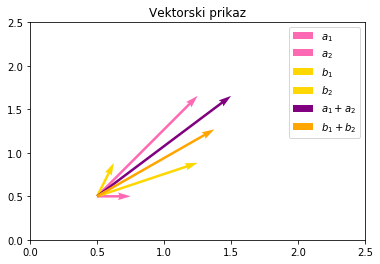

In [619]:
import numpy as np
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_xlim(0, 2.5)
ax1.set_ylim(0, 2.5)
ax1.set_title('Vektorski prikaz')
V = np.array([[1,0],[3,3],[4,3], [0.5,1], [3, 1], [3.5, 2]])
N = np.array([[5,1],[2,2],[7,3]])

a1 = ([1,0])
a2 = ([3,3])
a_rez = ( a1[0] + a2[0], a1[1] + a2[1] )
b1 = ([3,1])
b2 = ([0.5,1])
b_rez = ( b1[0] + b2[0], b1[1] + b2[1] )

origin = [0.5], [0.5] # origin point
plt.quiver(*origin, a1[0], a1[1], scale=10, color = 'hotpink', label = '$a_1$' )
plt.quiver(*origin, a2[0], a2[1], scale=10, color = 'hotpink', label = '$a_2$' )
plt.quiver(*origin, b1[0], b1[1], scale=10, color = 'gold', label = '$b_1$' )
plt.quiver(*origin, b2[0], b2[1], scale=10, color = 'gold', label = '$b_2$' )
plt.quiver(*origin, a_rez[0], a_rez[1], scale=10, color = 'purple', label = '$a_1+a_2$' )
plt.quiver(*origin, b_rez[0], b_rez[1], scale=10, color = 'orange', label = '$b_1+b_2$' )
plt.legend()

plt.show()

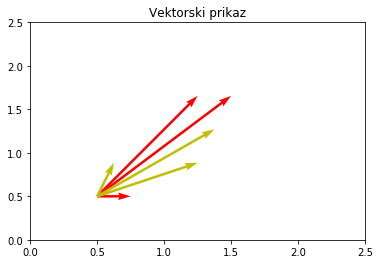

In [614]:
import numpy as np
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_xlim(0, 2.5)
ax1.set_ylim(0, 2.5)
ax1.set_title('Vektorski prikaz')
V = np.array([[1,0],[3,3],[4,3],[0.5,1], [3, 1], [3.5, 2]])
#N = np.array([[5,1],[2,2],[7,3], )

plt.quiver(*origin, V[:,0], V[:,1], color=['r','r','r', 'y', 'y', 'y'], scale=10)

In [ ]:
V = np.array([[5,1],[2,2],[7,3]])

In [447]:
def generate_gaussian_simpsons_paradox(n_subgroups=3, n_samples=1000):

    overall_cov = 3*np.array([[1,0.9], [0.9,1]])

    means = np.random.multivariate_normal(mean=[0,0], cov=overall_cov, size=n_subgroups)
    
    weights = np.random.uniform(size=n_subgroups)
    weights /= np.sum(weights)
    covs = [np.random.uniform(0.2,0.8) for _ in range(n_subgroups)]
    covs = [np.array([[1,-c], [-c,1]]) for c in covs]


    samples = []

    for sg, (mean, cov, w) in enumerate(zip(means, covs, weights)):
        n = int(round(n_samples * w))
        sample = np.random.multivariate_normal(mean=mean, cov=cov, size=n)
        sample = pd.DataFrame(sample, columns=["x", "y"])
        sample["z"] = sg
        samples.append(sample)
        
    df = pd.concat(samples)
    
    return df



In [448]:
df = generate_gaussian_simpsons_paradox(2, 300)

print("Total Covariance: {:.3f}".format(df[["x", "y"]].cov().iloc[0,1]))
for z in df.z.unique():
    print("Subgroup {} covariance: {:.3f}".format(z,df[df.z==z][["x", "y"]].cov().iloc[0,1]))

Total Covariance: 5.428
Subgroup 0 covariance: -0.409
Subgroup 1 covariance: -0.405


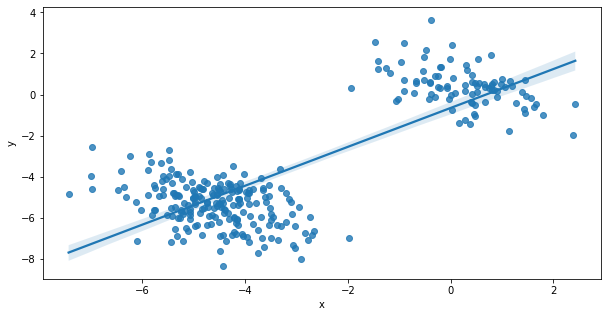

In [449]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(data=df, x="x", y="y");


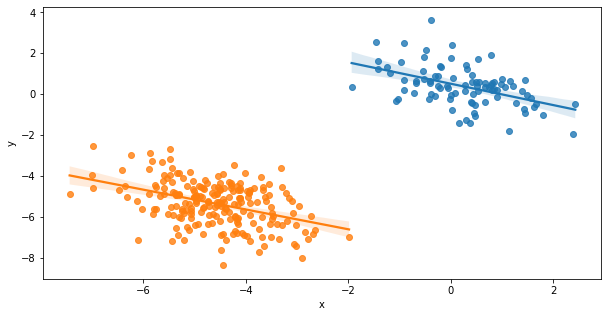

In [450]:


fig, ax = plt.subplots( figsize = (10, 5 ) )

#plt.xlim(-3,3);
#plt.ylim(-3,3);

for z in df.z.unique():
    sns.regplot(data=df[df.z==z], x="x", y="y", ax=ax)



In [461]:
import pandas as pd

url = 'https://raw.githubusercontent.com/tomarga/Sympsonov-paradox/master/californiaDDSDataV2.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,Age Cohort,Age,Gender,Expenditures,Ethnicity
Id,,,,,
10210,13 to 17,17,Female,2113,White not Hispanic
10409,22 to 50,37,Male,41924,White not Hispanic
10486,0 to 5,3,Male,1454,Hispanic
10538,18 to 21,19,Female,6400,Hispanic
10568,13 to 17,13,Male,4412,White not Hispanic


In [462]:
df.drop([ 'Age', 'Gender'], axis=1, inplace=True)
df.head()

,Age Cohort,Expenditures,Ethnicity
Id,,,
10210,13 to 17,2113,White not Hispanic
10409,22 to 50,41924,White not Hispanic
10486,0 to 5,1454,Hispanic
10538,18 to 21,6400,Hispanic
10568,13 to 17,4412,White not Hispanic


In [463]:
df = df[df.Ethnicity != 'Other']
df = df[df.Ethnicity != 'Native Hawaiian']

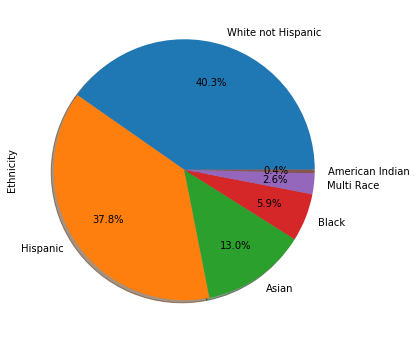

In [548]:
#df.Ethnicity.value_counts().plot.pie(figsize=(10, 10), autopct='%1.1f%%' )
ethnicity = set( df['Ethnicity'])
ethnicity = np.array( ethnicity )

population = df.groupby('Ethnicity')['Age Cohort'].count()

df.Ethnicity.value_counts().plot.pie(figsize=(6, 6), autopct='%1.1f%%', pctdistance=0.7, shadow = True)
plt.show()

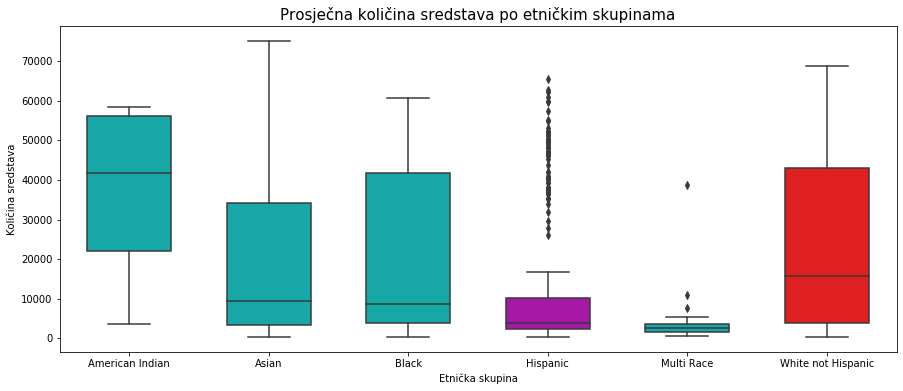

In [427]:
colors=["c","c","c","m","c", "r"]
figure, ax = plt.subplots(figsize=(15,6)) 
bplot=sns.boxplot(x='Ethnicity', y='Expenditures',data=df.sort_values('Ethnicity'), width= 0.6 , palette=colors)

bplot.axes.set_title('Prosječna količina sredstava po etničkim skupinama', fontsize=15) 
bplot.set_xlabel("Etnička skupina", fontsize=10 )
bplot.set_ylabel("Količina sredstava", fontsize=10) 
bplot.tick_params(labelsize=10)

In [428]:
prosjecna = df.groupby('Ethnicity').mean().sort_values('Expenditures')
prosjecna

,Expenditures
Ethnicity,
Multi Race,4456.730769
Hispanic,11065.569149
Asian,18392.372093
Black,20884.593220
White not Hispanic,24697.548628
American Indian,36438.250000


In [429]:
dict = prosjecna.to_dict()['Expenditures']

dict = sorted( dict.items())
keys = [elem[0] for elem in dict]
values = [elem[1] for elem in dict]

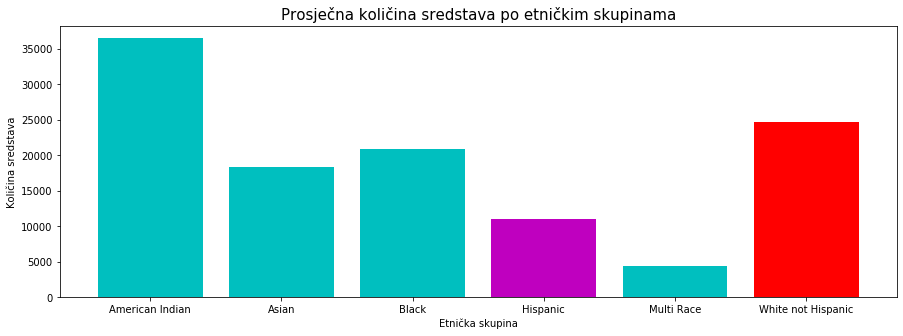

In [431]:
figure, ax = plt.subplots(figsize=(15,5)) 
ax.set_title('Prosječna količina sredstava po etničkim skupinama', fontsize=15)
plt.bar( keys, values, color='cccmcr' )
plt.xlabel("Etnička skupina", fontsize=10 )
plt.ylabel("Količina sredstava", fontsize=10) 
plt.show()

In [314]:
white = df[df['Ethnicity'] == 'White not Hispanic']
white = white.groupby('Age Cohort').mean().sort_values('Expenditures')

hispanic = df[df['Ethnicity'] == 'Hispanic']
hispanic = hispanic.groupby('Age Cohort').mean().sort_values('Expenditures')

age_white_hisp = white.merge( hispanic,left_index=True, right_index=True )
age_white_hisp.columns = ['White not Hispanic', 'Hispanic']
age_white_hisp.index.names = ['Dobna skupina']
#age_white_hisp


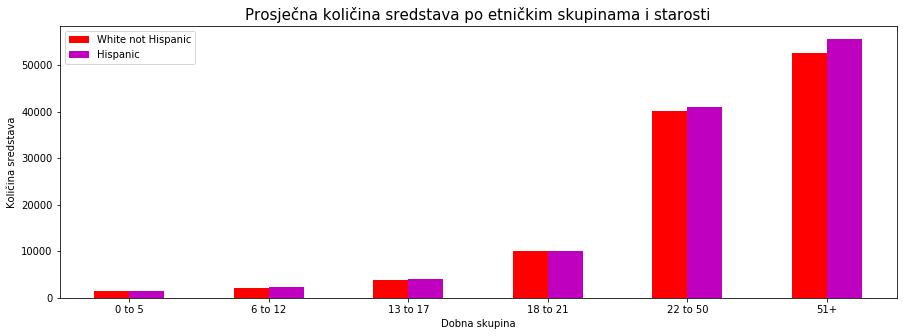

In [432]:
age_white_hisp.plot( kind="bar", figsize=(15,5), color='rm', 
                           title = "Prosječna količina sredstava po etničkim skupinama i starosti",
                           rot=0).title.set_size(15)
plt.ylabel("Količina sredstava", fontsize = 10)
plt.show()